In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('final_internship_data.csv')
df.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [3]:
print(df.columns.tolist())

['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather', 'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month', 'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance', 'bearing']


# Data normalization


In [4]:
df.drop(['User Name','Driver Name','User ID'], axis=1, inplace=True)
df.head()

,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,0.710721,-1.288779,0.710563,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,0.710546,-1.291182,0.711780,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,0.711418,-1.291391,0.711231,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,0.710927,-1.291396,0.711363,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,0.711536,-1.290787,0.711811,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


# Change string into integer 

In [5]:
# Extract the weather type (e.g., 'Sunny') before the number
df['Weather'], weather_labels = pd.factorize(df['Weather'])


# Encode 'Car Condition'
car_condition_mapping = {label: idx for idx, label in enumerate(df['Car Condition'].unique())}
df['Car Condition'] = df['Car Condition'].map(car_condition_mapping)

# Encode 'Traffic Condition'
traffic_condition = {label: idx for idx, label in enumerate(df['Traffic Condition'].unique())}
df['Traffic Condition'] = df['Traffic Condition'].map(traffic_condition)


In [6]:
df.head()

,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,0,0,0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,0.710721,-1.288779,0.710563,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,1,1,1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,0.710546,-1.291182,0.711780,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,2,2,0,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,0.711418,-1.291391,0.711231,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,0,2,1,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,0.710927,-1.291396,0.711363,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,2,2,0,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,0.711536,-1.290787,0.711811,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


# Data cleansing

In [7]:
print(df.isnull().count())


Car Condition        500000
Weather              500000
Traffic Condition    500000
key                  500000
fare_amount          500000
pickup_datetime      500000
pickup_longitude     500000
pickup_latitude      500000
dropoff_longitude    500000
dropoff_latitude     500000
passenger_count      500000
hour                 500000
day                  500000
month                500000
weekday              500000
year                 500000
jfk_dist             500000
ewr_dist             500000
lga_dist             500000
sol_dist             500000
nyc_dist             500000
distance             500000
bearing              500000
dtype: int64


In [8]:
df = df.fillna(0)

In [9]:
print(df.duplicated())

0         False
1         False
2         False
3         False
4         False
          ...  
499995    False
499996    False
499997    False
499998    False
499999    False
Length: 500000, dtype: bool


# Data analysis

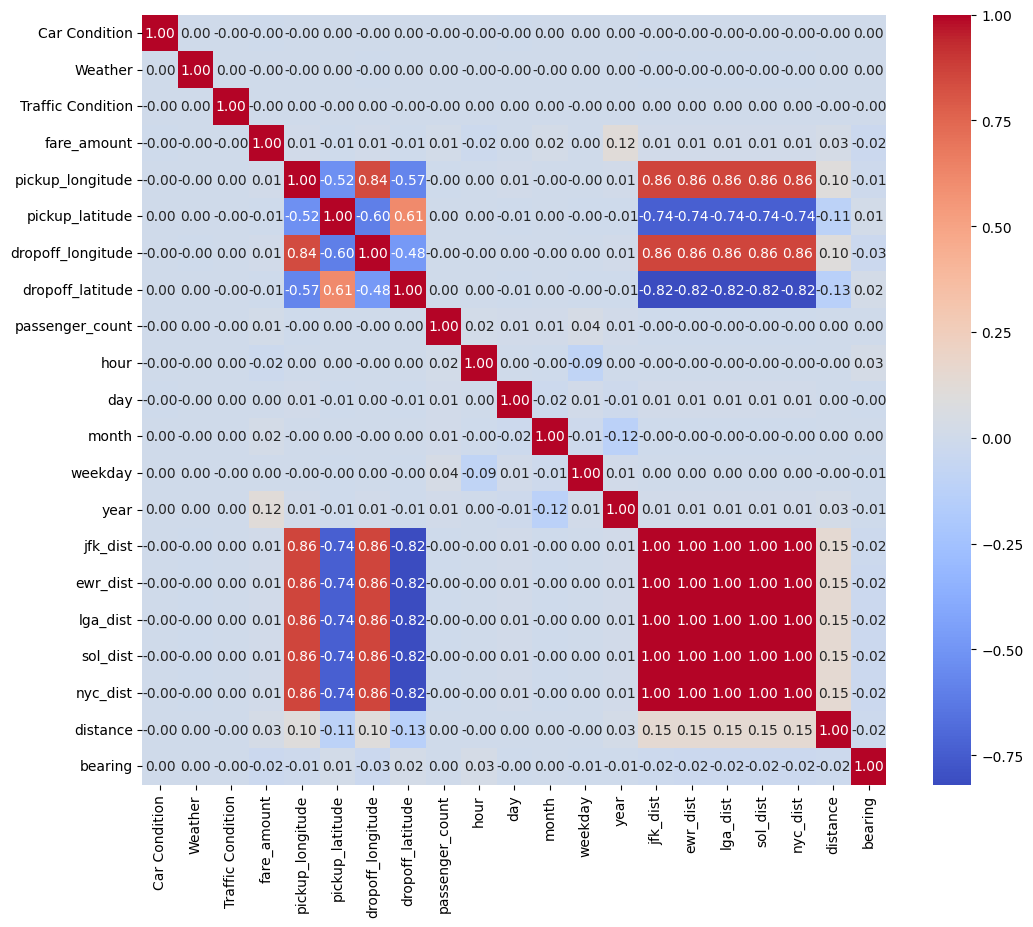

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

- Outlier and visualization
- PCA


Distribution of Numeric Features:


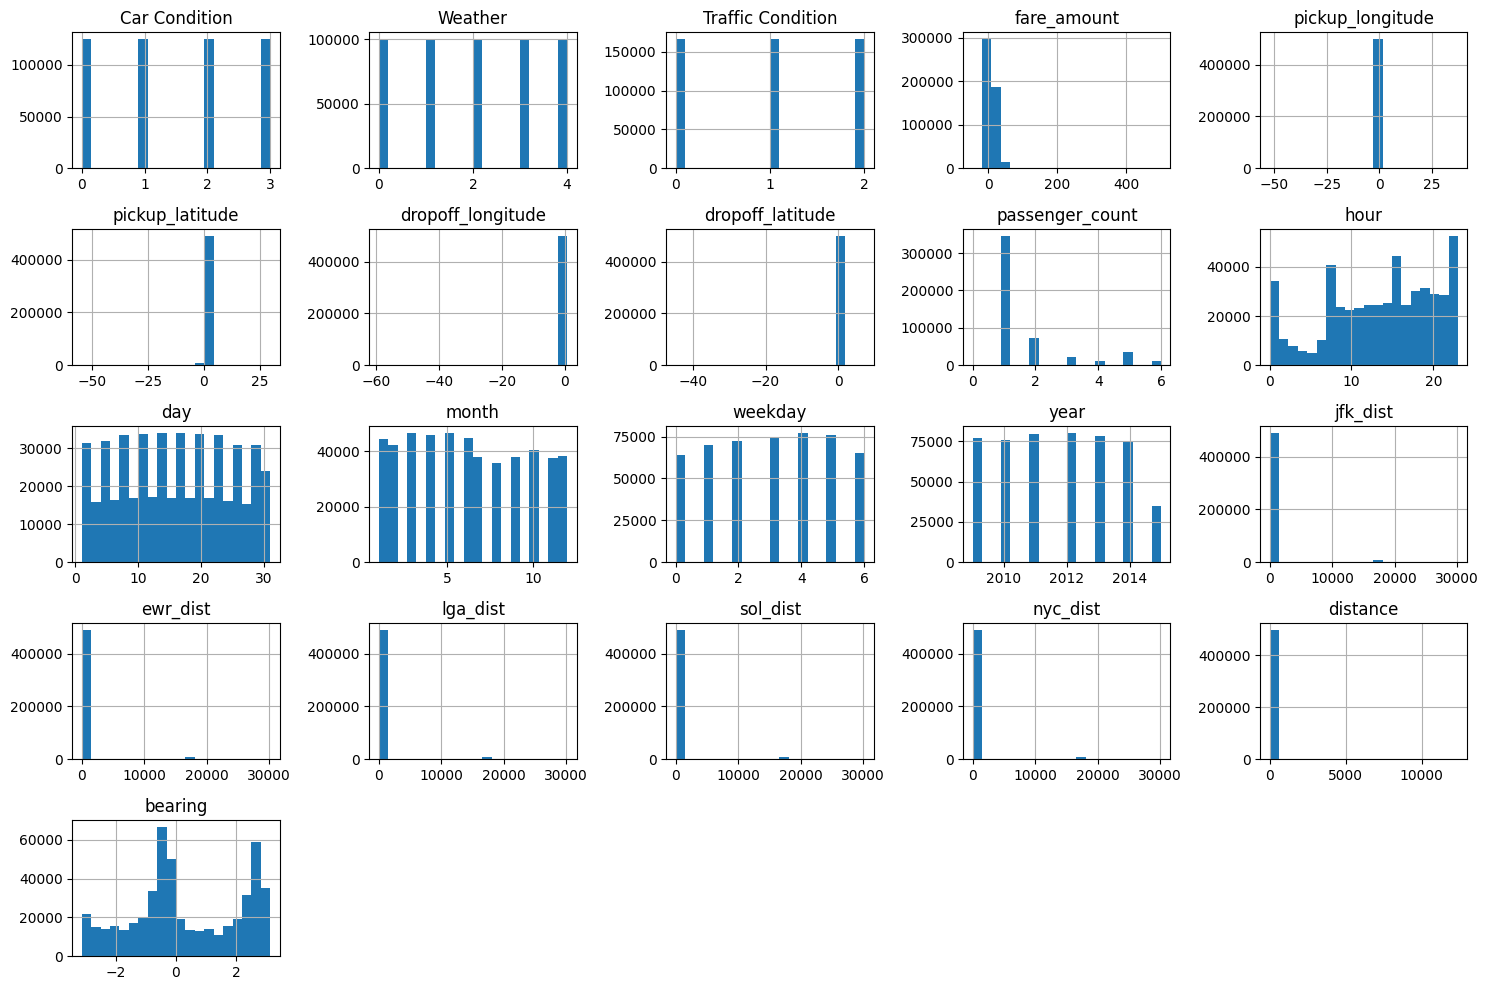


Boxplots for Outlier Detection:


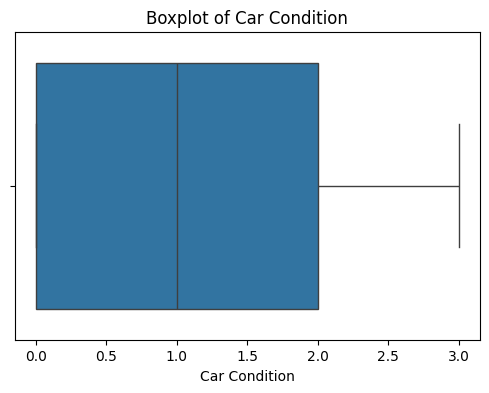

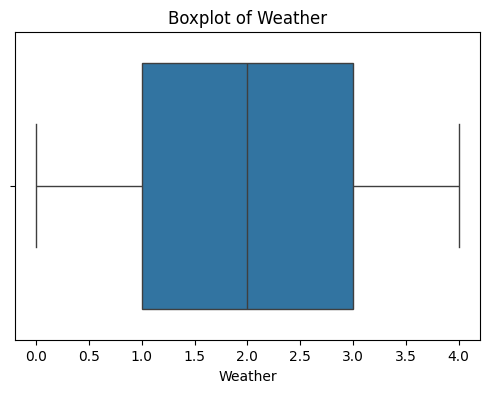

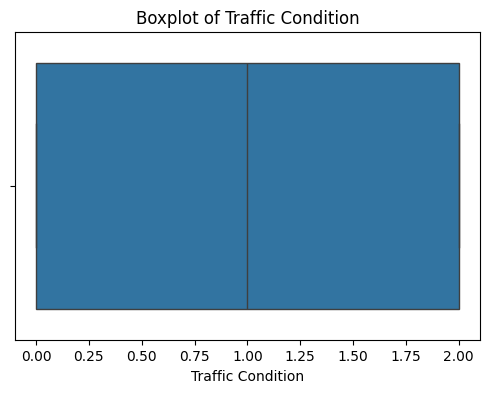

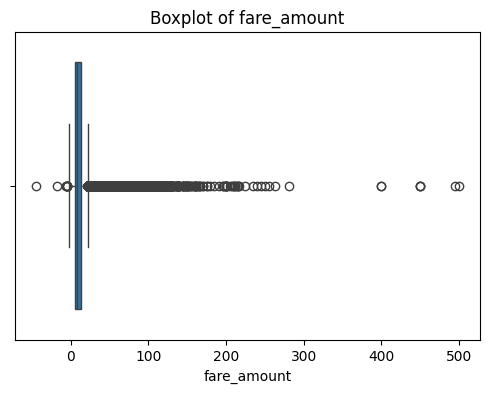

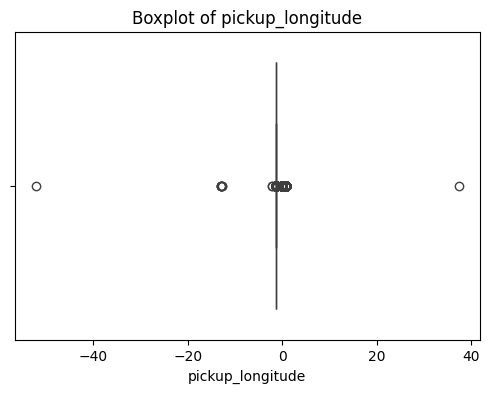

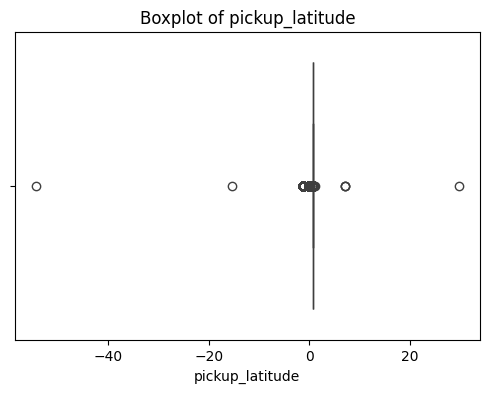

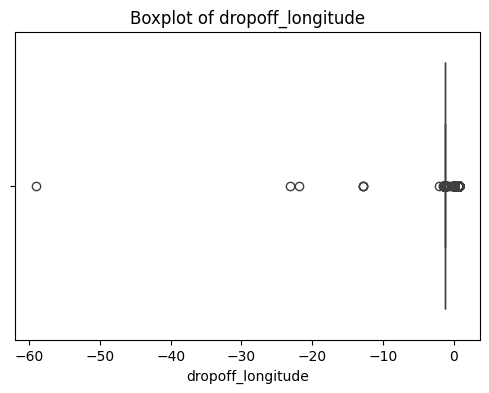

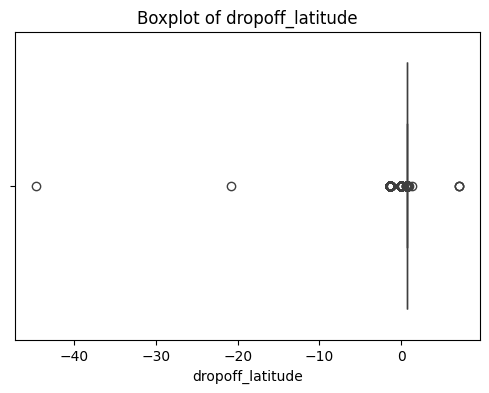

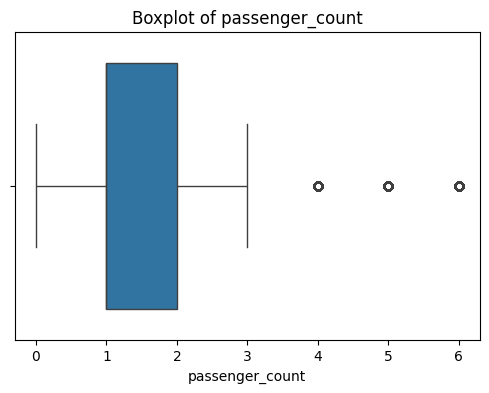

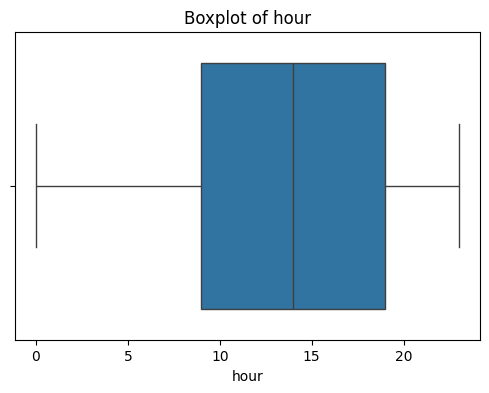

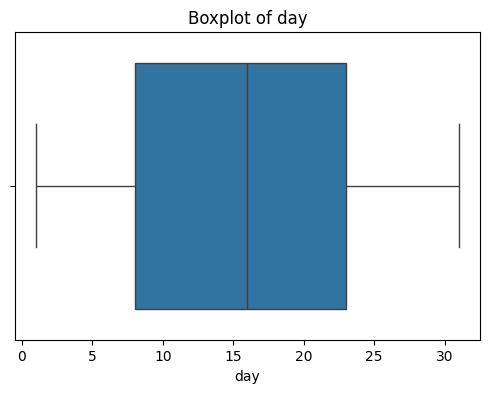

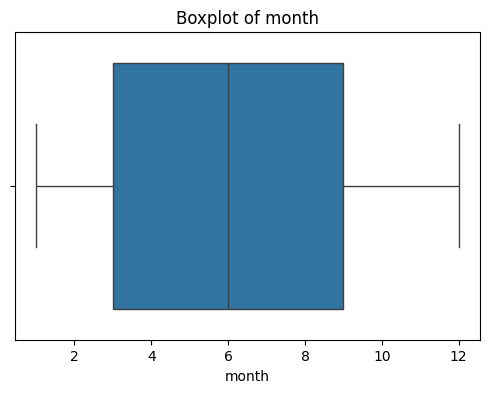

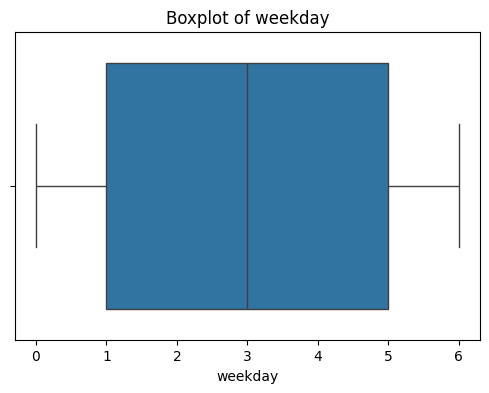

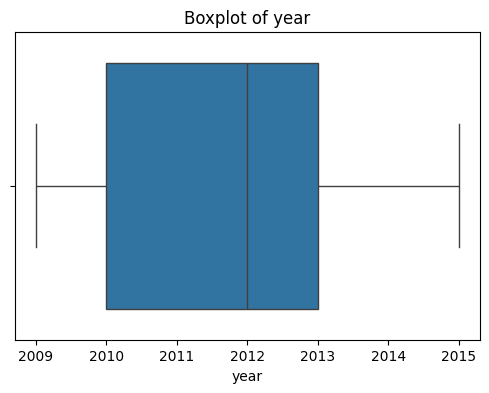

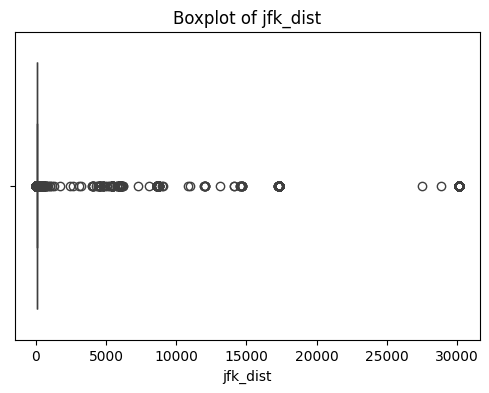

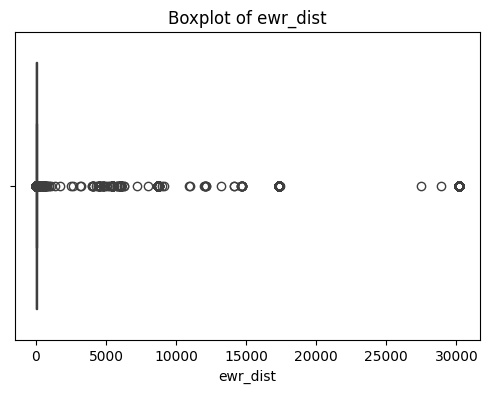

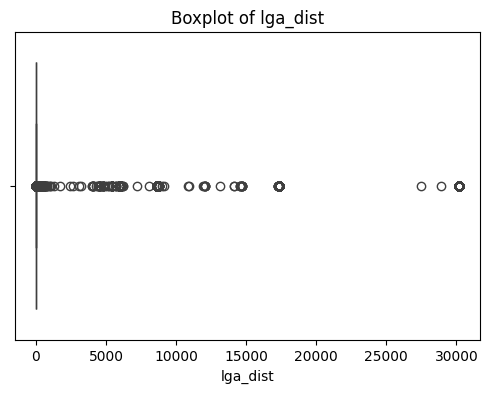

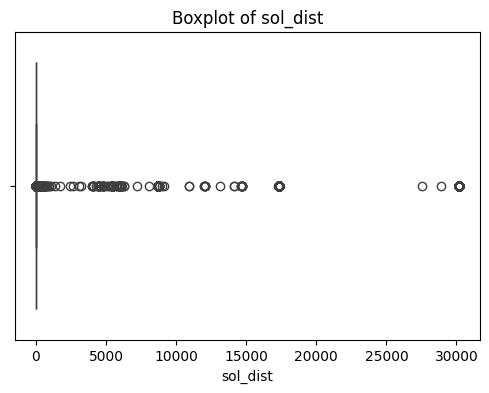

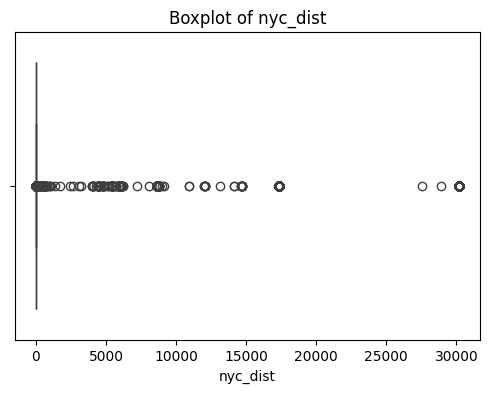

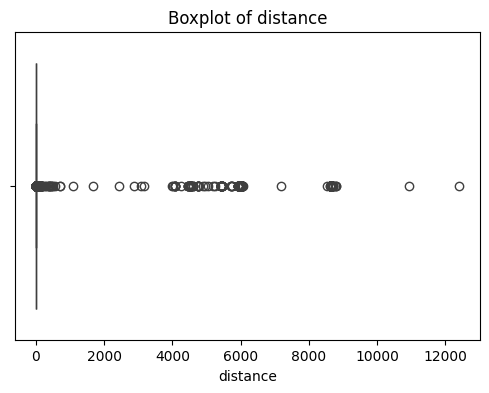

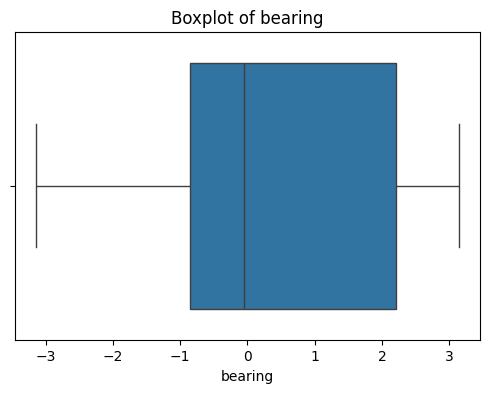

In [ ]:
print("\nDistribution of Numeric Features:")
df[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()
# Boxplots to check for outliers
print("\nBoxplots for Outlier Detection:")
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [14]:
# # PCA Analysis Block

# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt
# import pandas as pd

# # Assuming your dataset is in a DataFrame called 'df' and numerical features are selected

# # Step 1: Select numeric columns for PCA
# numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
# X = df[numeric_cols].dropna()  # drop NA values for PCA

# # Step 2: Standardize the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Step 3: Apply PCA
# pca = PCA(n_components=2)  # change to higher number if needed
# X_pca = pca.fit_transform(X_scaled)

# # Step 4: Create DataFrame with PCA results
# pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# # Step 5: Plot PCA result
# plt.figure(figsize=(8,6))
# plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA Result')
# plt.grid(True)
# plt.show()

# # Step 6: Show explained variance
# print("Explained variance ratio by components:")
# print(pca.explained_variance_ratio_)
